<a href="https://colab.research.google.com/github/Gamalia75/my_repository/blob/main/Lesson_69/HW_69_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лекція 69: Overfitting, underfitting, аругментація даних

### Завдання:

#### З бібліотеки датасетів Tensorflow за допомогою функції tfds.load завантажте датасет  під назвою “cars196”. Застосуйте до зображення із цього датасету аугментаційні перетворення:
* #### дзеркальне відображення
* #### зміна насиченості кольорів
* #### відображення в grayscale
* #### поворот на 90 градусів
* #### обрізка по краях
* #### зміна яскравості

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Завантажуємо датасет cars196
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'cars196',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/cars196/2.1.0.incompleteJ2QLC8/cars196-train.tfrecord*...:   0%|          …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cars196/2.1.0.incompleteJ2QLC8/cars196-test.tfrecord*...:   0%|          |…

Dataset cars196 downloaded and prepared to /root/tensorflow_datasets/cars196/2.1.0. Subsequent calls will reuse this data.


In [4]:
# Функція для отримання назви категорії
get_label_name = metadata.features['label'].int2str

In [5]:
# Витягуємо зображення по номеру
n=4
for i, (image, label) in enumerate(test_ds):
  if i== n-1:
    break

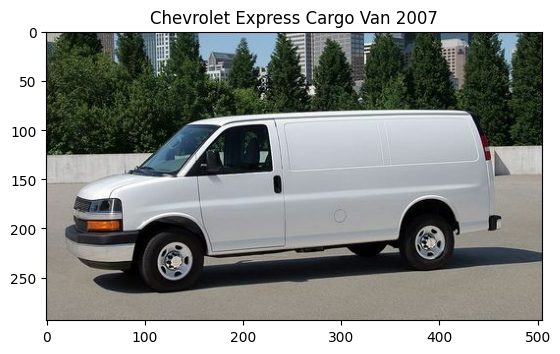

In [6]:
#image, label = next(iter(test_ds)) Витягуємо перше зображення 
plt.imshow(image)
plt.title(get_label_name(label));

In [7]:
# Функція для відображення зміненого зображення 
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")
 
    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    plt.axis("off")

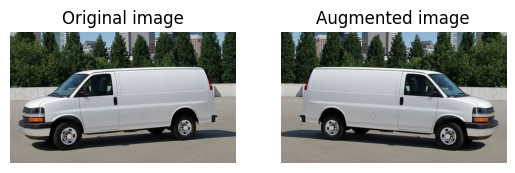

In [8]:
# Зеркальне відображення
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

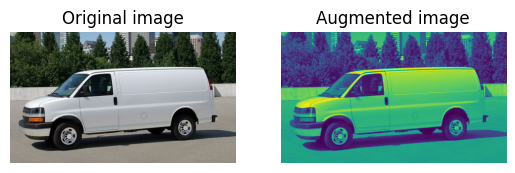

In [9]:
# Відтінки сірого
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image,  tf.squeeze(grayscaled))

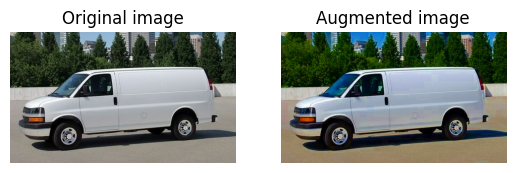

In [10]:
# Зміна насиченості
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

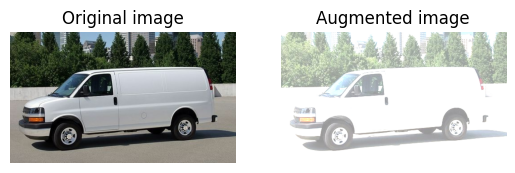

In [11]:
# Зміна яскравості
bright = tf.image.adjust_brightness(image, 0.6)
visualize(image, bright)

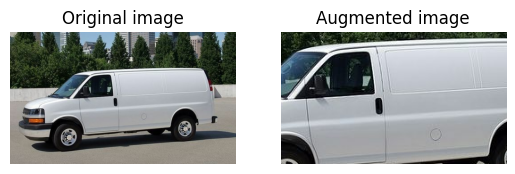

In [12]:
# Обрізання зображення
cropped = tf.image.central_crop(image, 
                                central_fraction=0.5)
visualize(image, cropped)

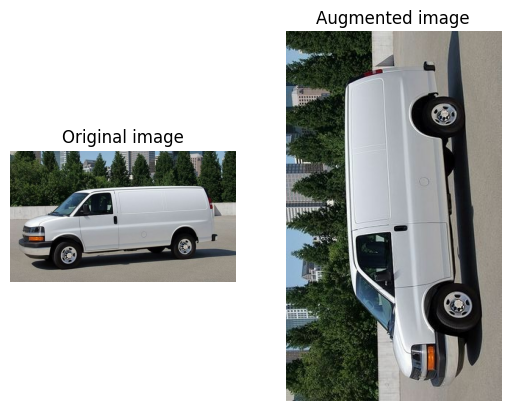

In [13]:
# Поворот на 90 градусів
rotated = tf.image.rot90(image)
visualize(image, rotated)

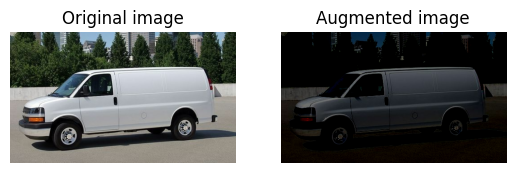

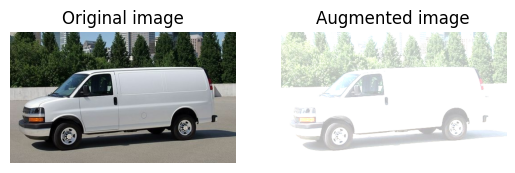

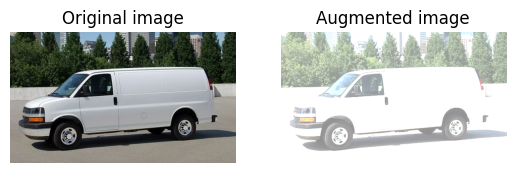

In [14]:
# Зміна яскравості за допомогою функції випадкової величини яскравості
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_brightness = tf.image.stateless_random_brightness(
      image, max_delta=0.95, seed=seed)
  visualize(image, stateless_random_brightness)